In [151]:
#### import sys
import numpy as np
import cv2
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
import pickle
from sklearn.preprocessing import PolynomialFeatures
import logging
logging.basicConfig(level=logging.INFO)
p1 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCal')
p3 = os.path.join('../../','raw','CookIRCamET','Images','CprlIRCal')
p5 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir2')
p7 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir3')
p9 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlirV2')
p11 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlirField')
p13 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlirV3')
p15 = os.path.join('../../','work','CookIRCamET','Working')

In [ ]:
T_ir=[]
T_bb=[]
T_ir_field=[]
T_bb_field=[]

for f in np.sort(os.listdir(p11)):
    if 'ir' in f: 
        if f=='27_1_ir.png' or f=='32_1_ir.png':
            i=56
            di=2
            j=96
            dj=2
            ir = cv2.imread(os.path.join(p11,f),cv2.IMREAD_UNCHANGED)          
            T_bb_field.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
            T_ir_field.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))
        else:
            i=66
            di=10
            j=116
            dj=10
            ir = cv2.imread(os.path.join(p11,f),cv2.IMREAD_UNCHANGED)
            T_bb.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
            T_ir.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))

ind=np.argsort(np.array(T_ir))

In [ ]:
T_ir=np.array(T_ir)[ind].reshape((-1,1))
T_bb=np.array(T_bb)[ind].reshape((-1,1))
T_bb_field=np.array(T_bb_field)
T_ir_field=np.array(T_ir_field)

In [ ]:
I0=T_ir[8]
I1=T_ir[9]

In [ ]:
print("I0 {0}, I1 {1}".format(I0,I1))

In [ ]:
outliers = [10,14]

In [ ]:
T_ir=np.delete(T_ir,outliers).reshape((-1,1))
T_bb=np.delete(T_bb,outliers).reshape((-1,1))

In [ ]:
model0 = LinearRegression()
model0.fit(T_ir[0:9],T_bb[0:9])
model1 = LinearRegression()
model1.fit(T_ir[8:10],T_bb[8:10])
model2 = LinearRegression()
model2.fit(T_ir[9:],T_bb[9:])

In [ ]:
print("model 0 {0}, {1}".format(model0.coef_,model0.intercept_))
print("model 1 {0}, {1}".format(model1.coef_,model1.intercept_))
print("model 2 {0}, {1}".format(model2.coef_,model2.intercept_))

In [ ]:
T_pred = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])


plt.plot(T_ir,T_bb,'.',T_ir,T_pred,T_ir_field,T_bb_field,'x')

In [ ]:
with open(os.path.join(p15,'calibration_nsar_pwlf.pk.sav'), 'wb') as f:  # Python 3: open(..., 'wb'
    pickle.dump([model0, model1, model2, I0, I1], f)

In [128]:
T_ir=[]
T_bb=[]
T_ir_field=[]
T_bb_field=[]
#'13_7_ir.png','15_7_ir.png','18_3_ir.png','21_6_ir.png','25_7_ir.png','30_7_ir.png','37_0_ir.png',
a = ['5_6_ir.png'] 
hot  = ['26_5_ir.png','29_8_ir.png','32_6_ir.png','34_7_ir.png','36_4_ir.png','37_6_ir.png','38_6_ir.png','39_3_ir.png','39_9_ir.png','40_3_ir.png','40_7_ir.png','41_0_ir.png']
cold = ['7_1_ir.png','7_7_ir.png','8_4_ir.png','9_2_ir.png','10_1_ir.png','11_3_ir.png','13_7_ir (2).png','15_6_ir.png','17_6_ir.png','19_8_ir.png']
#c = ['19_5_ir.png','17_5_ir.png','15_4_ir.png']

di=12
dj=12
for f in np.sort(os.listdir(p13)):
    if f in a:        
        i=66
        j=90
        print(f)
        ir = cv2.imread(os.path.join(p13,f),cv2.IMREAD_UNCHANGED)
        # plt.imshow(ir)
        # plt.show()
    
        T_bb.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
        T_ir.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))
        # plt.imshow(ir[i-di:i+di,j-dj:j+dj])
        # plt.show()
    elif f in hot:        
        i=84
        j=90
        print(f)
        ir = cv2.imread(os.path.join(p13,f),cv2.IMREAD_UNCHANGED)
        # plt.imshow(ir)
        # plt.show()
    
        T_bb.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
        T_ir.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))
        # plt.imshow(ir[i-di:i+di,j-dj:j+dj])
        # plt.show()
    elif f in cold:        
        i=86
        j=75
        print(f)
        ir = cv2.imread(os.path.join(p13,f),cv2.IMREAD_UNCHANGED)
        # plt.imshow(ir)
        # plt.show()
    
        T_bb.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
        T_ir.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))
        # plt.imshow(ir[i-di:i+di,j-dj:j+dj])
        # plt.show()

ind=np.argsort(np.array(T_ir))

10_1_ir.png
11_3_ir.png
13_7_ir (2).png
15_6_ir.png
17_6_ir.png
19_8_ir.png
26_5_ir.png
29_8_ir.png
32_6_ir.png
34_7_ir.png
36_4_ir.png
37_6_ir.png
38_6_ir.png
39_3_ir.png
39_9_ir.png
40_3_ir.png
40_7_ir.png
41_0_ir.png
5_6_ir.png
7_1_ir.png
7_7_ir.png
8_4_ir.png
9_2_ir.png


In [129]:
T_ir=np.array(T_ir)[ind].reshape((-1,1))
T_bb=np.array(T_bb)[ind].reshape((-1,1))
T_bb_field=np.array(T_bb_field)
T_ir_field=np.array(T_ir_field)

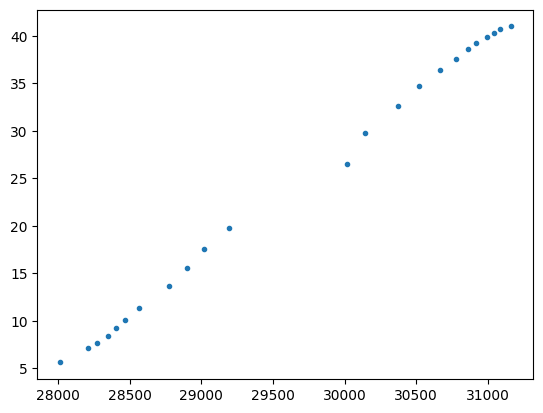

In [130]:
plt.plot(T_ir,T_bb-273.15,'.')

In [ ]:
pf = PolynomialFeatures(2)
T_ir_ = pf.fit_transform(T_ir)

In [154]:
T_ir_

array([[1.00000000e+00, 2.80134965e+04, 7.84755988e+08],
       [1.00000000e+00, 2.82111597e+04, 7.95869533e+08],
       [1.00000000e+00, 2.82743056e+04, 7.99436355e+08],
       [1.00000000e+00, 2.83491128e+04, 8.03672199e+08],
       [1.00000000e+00, 2.84034392e+04, 8.06755360e+08],
       [1.00000000e+00, 2.84678194e+04, 8.10416744e+08],
       [1.00000000e+00, 2.85683490e+04, 8.16150562e+08],
       [1.00000000e+00, 2.87718385e+04, 8.27818693e+08],
       [1.00000000e+00, 2.89032517e+04, 8.35397961e+08],
       [1.00000000e+00, 2.90214601e+04, 8.42245145e+08],
       [1.00000000e+00, 2.91906458e+04, 8.52093804e+08],
       [1.00000000e+00, 3.00198837e+04, 9.01193416e+08],
       [1.00000000e+00, 3.01444184e+04, 9.08685961e+08],
       [1.00000000e+00, 3.03705382e+04, 9.22369590e+08],
       [1.00000000e+00, 3.05181354e+04, 9.31356589e+08],
       [1.00000000e+00, 3.06638212e+04, 9.40269929e+08],
       [1.00000000e+00, 3.07806615e+04, 9.47449120e+08],
       [1.00000000e+00, 3.08591

In [173]:
i0 = 10
i1 = 11

In [174]:
I0=T_ir[i0]
I1=T_ir[i1]

In [175]:
print("I0 {0}, I1 {1}".format(I0,I1))

I0 [29190.64583333], I1 [30019.88368056]


In [176]:
model0 = LinearRegression()
model0.fit(T_ir_[0:i0+1,:],T_bb[0:i0+1])
model1 = LinearRegression()
model1.fit(T_ir_[i0:i1+1,:],T_bb[i0:i1+1])
model2 = LinearRegression()
model2.fit(T_ir_[i1:,:],T_bb[i1:])
model = LinearRegression()
model.fit(T_ir,T_bb)

LinearRegression()

In [177]:
T_ir_

array([[1.00000000e+00, 2.80134965e+04, 7.84755988e+08],
       [1.00000000e+00, 2.82111597e+04, 7.95869533e+08],
       [1.00000000e+00, 2.82743056e+04, 7.99436355e+08],
       [1.00000000e+00, 2.83491128e+04, 8.03672199e+08],
       [1.00000000e+00, 2.84034392e+04, 8.06755360e+08],
       [1.00000000e+00, 2.84678194e+04, 8.10416744e+08],
       [1.00000000e+00, 2.85683490e+04, 8.16150562e+08],
       [1.00000000e+00, 2.87718385e+04, 8.27818693e+08],
       [1.00000000e+00, 2.89032517e+04, 8.35397961e+08],
       [1.00000000e+00, 2.90214601e+04, 8.42245145e+08],
       [1.00000000e+00, 2.91906458e+04, 8.52093804e+08],
       [1.00000000e+00, 3.00198837e+04, 9.01193416e+08],
       [1.00000000e+00, 3.01444184e+04, 9.08685961e+08],
       [1.00000000e+00, 3.03705382e+04, 9.22369590e+08],
       [1.00000000e+00, 3.05181354e+04, 9.31356589e+08],
       [1.00000000e+00, 3.06638212e+04, 9.40269929e+08],
       [1.00000000e+00, 3.07806615e+04, 9.47449120e+08],
       [1.00000000e+00, 3.08591

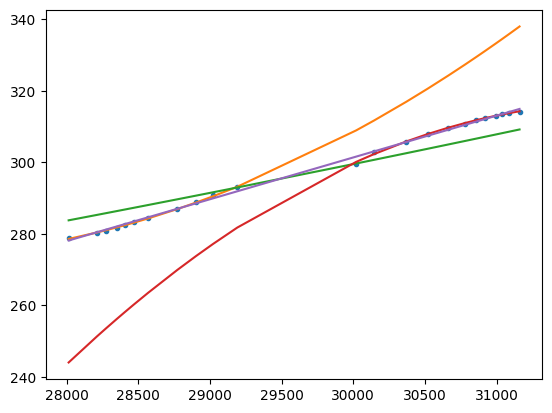

In [181]:
T_pred_0 = model0.predict(T_ir_)
T_pred_1 = model1.predict(T_ir_)
T_pred_2 = model2.predict(T_ir_)
T_pred_all = model.predict(T_ir)

plt.plot(T_ir,T_bb,'.',T_ir,T_pred_0,T_ir,T_pred_1,T_ir,T_pred_2,T_ir,T_pred_all)

In [167]:
print("model 0 {0}, {1}".format(model0.coef_,model0.intercept_))
print("model 1 {0}, {1}".format(model1.coef_,model1.intercept_))
print("model 2 {0}, {1}".format(model2.coef_,model2.intercept_))
print("model {0}, {1}".format(model.coef_,model.intercept_))

model 0 [[ 0.00000000e+00  8.12649931e-02 -1.20833609e-06]], [-1050.60770669]
model 1 [[5.29395592e-23 7.32058381e-12 4.40437816e-07]], [-97.26966003]
model 2 [[ 0.00000000e+00  2.12555851e-01 -3.28099436e-06]], [-3123.17114955]
model [[0.01169216]], [-49.41840894]


In [ ]:
with open(os.path.join(p13,'calibration_nsar_pwlf_v3.pk.sav'), 'wb') as f:  # Python 3: open(..., 'wb'
    pickle.dump([model0, model1, model2, I0, I1], f)

In [ ]:
p0 = os.path.join('../../','raw','CookIRCamET','Images','CookHY2023','V1')
for f in np.flip(np.sort(os.listdir(p0))):
    if 'ir' in f:
        T_ir = cv2.imread(os.path.join(p0,f),cv2.IMREAD_UNCHANGED)
               
        T_ir = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])
        print(f)
        plt.imshow(T_ir)

        plt.colorbar()
        plt.show()
        